Introducción

JUSTIFICAR PARAMETROS

En la era de la informática y el big data, el procesamiento de flujos de datos se ha convertido en una tarea fundamental. Los flujos de datos representan un tipo especial de datos que se generan continuamente en tiempo real y que presentan desafíos únicos en términos de análisis y modelado. La biblioteca River, una potente herramienta de aprendizaje automático en línea, proporciona soluciones efectivas para abordar estos desafíos.

En este trabajo, exploraremos el procesamiento de flujos de datos utilizando la biblioteca River en un contexto de predicción de enfermedades del corazón. Utilizaremos un conjunto de datos de Kaggle que contiene información clínica relevante para predecir enfermedades cardíacas. En este proceso, destacaremos el uso de ARF (Adaptive Random Forest), un modelo de clasificación en línea que se adapta de manera continua a los datos entrantes. También exploraremos la detección de drift mediante el detector ADWIN (Adaptive Windowing) y la detección de outliers para garantizar la robustez del modelo.

A lo largo de este trabajo, dividiremos el código en celdas y proporcionaremos explicaciones detalladas sobre cada componente, desde la inicialización del modelo hasta la gestión de drift y la importancia de la detección de outliers. Exploraremos cómo funciona el modelo ARF y cómo ADWIN identifica cambios en el flujo de datos. Además, discutiremos la importancia de la detección de outliers en la garantía de calidad y la integridad de los modelos de aprendizaje automático en línea.

Este trabajo servirá como una introducción práctica al procesamiento de flujos de datos con River y brindará una comprensión más profunda de los conceptos clave que sustentan esta tecnología.

Accuracy at instance 0: 0.00
Accuracy at instance 1: 0.00
Accuracy at instance 2: 0.00
Accuracy at instance 3: 0.00
Accuracy at instance 4: 0.00
Accuracy at instance 5: 0.17
Accuracy at instance 6: 0.29
Accuracy at instance 7: 0.25
Accuracy at instance 8: 0.33
Accuracy at instance 9: 0.40
Accuracy at instance 10: 0.45
Accuracy at instance 11: 0.50
Accuracy at instance 12: 0.46
Accuracy at instance 13: 0.50
Accuracy at instance 14: 0.53
Accuracy at instance 15: 0.50
Accuracy at instance 16: 0.47
Accuracy at instance 17: 0.50
Accuracy at instance 18: 0.53
Accuracy at instance 19: 0.50
Accuracy at instance 20: 0.52
Accuracy at instance 21: 0.50
Accuracy at instance 22: 0.48
Accuracy at instance 23: 0.46
Accuracy at instance 24: 0.44
Accuracy at instance 25: 0.42
Accuracy at instance 26: 0.44
Accuracy at instance 27: 0.46
Accuracy at instance 28: 0.45
Accuracy at instance 29: 0.47
Accuracy at instance 30: 0.45
Accuracy at instance 31: 0.47
Accuracy at instance 32: 0.45
Accuracy at instance

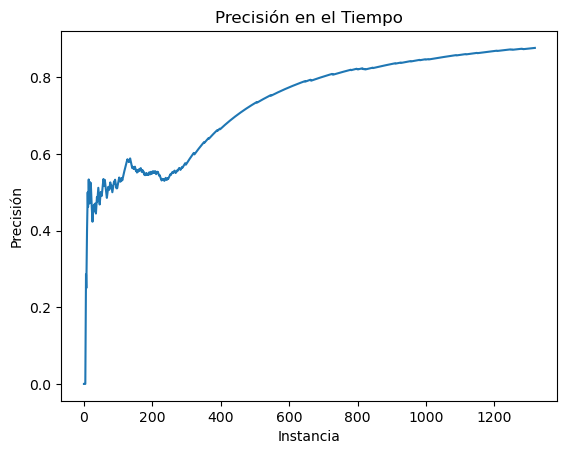

F1 Score: 0.00
MCC Score: 0.00


In [2]:
from river.drift import ADWIN
from river import forest
from river import tree
import pandas as pd
from river import anomaly
from river import metrics
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset/data
#Analisis datos: Diego
#Inigo que graficas y errores
# Crear un ARF Classifier
#arf = forest.ARFClassifier(n_models=3, seed=8, leaf_prediction="mc", drift_detector=ADWIN(), drift_window_threshold=50)
arf = tree.HoeffdingAdaptiveTreeClassifier(
    drift_detector=ADWIN(), 
    drift_window_threshold=50,
    grace_period=20
)

# Inicializar métricas
f1 = metrics.F1()
mcc = metrics.MCC()
accuracy = metrics.Accuracy()

# Detección de outliers con HalfSpaceTrees
outlier_detector = anomaly.HalfSpaceTrees()
adwin_detector = ADWIN()
# Simular un flujo de datos
data = pd.read_csv("Heart Attack.csv")

accuracies = []


for i, row in data.iterrows():
    x = row.drop(['class'])
    y = row['class']
    detector.update(x[2])
    # Detección de outliers

    # Detección de outliers
    #values_list = x.tolist()
    is_outlier = outlier_detector.score_one(x)
    if is_outlier == 0:
        # Entrenar el ARF solo si no es un outlier
        y_pred = arf.predict_one(x)
        arf.learn_one(x, y)
        
        # Actualizar las métricas
        f1.update(y, y_pred)
        mcc.update(y, y_pred)
        accuracy.update(y, y_pred)
        print(f"Accuracy at instance {i}: {accuracy.get():.2f}")
        adwin_detector.update(accuracy.get())
        if adwin_detector.drift_detected:
        #if arf.drift_detector.drift_detected:
            print(f"*** Warning: Drift detected at instance {i}, reseteamos el modelo ***")

        

    if is_outlier == 1:
        print(f"Outlier detected at instance {i}, datos no usados en entrenamiento")

    # Calcular la precisión para un solo dato


    
    accuracies.append(accuracy.get())

# Crear un gráfico de precisión en el tiempo
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel("Instancia")
plt.ylabel("Precisión")
plt.title("Precisión en el Tiempo")
plt.show()

# Calcular métricas finales
print(f"F1 Score: {f1.get():.2f}")
print(f"MCC Score: {mcc.get():.2f}")


Accuracy at instance 0: 0.00
Accuracy at instance 1: 0.00
Accuracy at instance 2: 0.00
Accuracy at instance 3: 0.00
Accuracy at instance 4: 0.20
Accuracy at instance 5: 0.33
Accuracy at instance 6: 0.43
Accuracy at instance 7: 0.38
Accuracy at instance 8: 0.44
Accuracy at instance 9: 0.50
Accuracy at instance 10: 0.55
Accuracy at instance 11: 0.58
Accuracy at instance 12: 0.54
Accuracy at instance 13: 0.57
Accuracy at instance 14: 0.60
Accuracy at instance 15: 0.56
Accuracy at instance 16: 0.53
Accuracy at instance 17: 0.56
Accuracy at instance 18: 0.58
Accuracy at instance 19: 0.55
Accuracy at instance 20: 0.57
Accuracy at instance 21: 0.55
Accuracy at instance 22: 0.57
Accuracy at instance 23: 0.54
Accuracy at instance 24: 0.56
Accuracy at instance 25: 0.58
Accuracy at instance 26: 0.59
Accuracy at instance 27: 0.61
Accuracy at instance 28: 0.59
Accuracy at instance 29: 0.57
Accuracy at instance 30: 0.55
Accuracy at instance 31: 0.56
Accuracy at instance 32: 0.55
Accuracy at instance

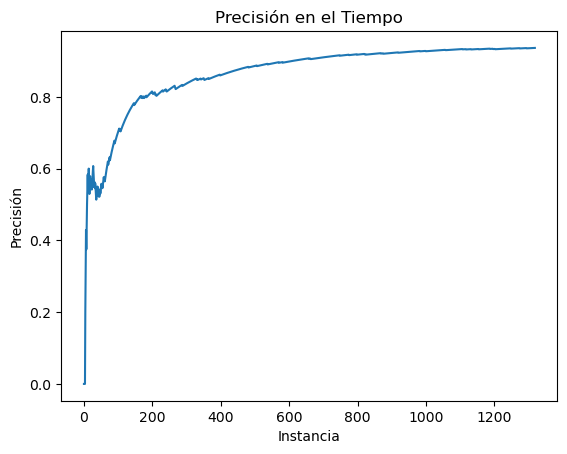

F1 Score: 0.00
MCC Score: 0.00


In [3]:
from river.drift import ADWIN
from river import forest
from river import tree
import pandas as pd
from river import anomaly
from river import metrics
import matplotlib.pyplot as plt

# Crear un ARF Classifier
arf = forest.ARFClassifier(drift_detector=ADWIN())

# Inicializar métricas
f1 = metrics.F1()
mcc = metrics.MCC()
accuracy = metrics.Accuracy()

# Detección de outliers con HalfSpaceTrees
outlier_detector = anomaly.HalfSpaceTrees()
adwin_detector = ADWIN()
# Simular un flujo de datos
data = pd.read_csv("Heart Attack.csv")

accuracies = []


for i, row in data.iterrows():
    x = row.drop(['class'])
    y = row['class']
    detector.update(x[2])
    # Detección de outliers

    # Detección de outliers
    #values_list = x.tolist()
    is_outlier = outlier_detector.score_one(x)
    if is_outlier == 0:
        # Entrenar el ARF solo si no es un outlier
        y_pred = arf.predict_one(x)
        arf.learn_one(x, y)
        
        # Actualizar las métricas
        f1.update(y, y_pred)
        mcc.update(y, y_pred)
        accuracy.update(y, y_pred)
        print(f"Accuracy at instance {i}: {accuracy.get():.2f}")
        adwin_detector.update(accuracy.get())
        if adwin_detector.drift_detected:
            print(f"*** Warning: Drift detected at instance {i}, reseteamos el modelo ***")

        

    if is_outlier == 1:
        print(f"Outlier detected at instance {i}")

    # Calcular la precisión para un solo dato


    
    accuracies.append(accuracy.get())

# Crear un gráfico de precisión en el tiempo
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel("Instancia")
plt.ylabel("Precisión")
plt.title("Precisión en el Tiempo")
plt.show()

# Calcular métricas finales
print(f"F1 Score: {f1.get():.2f}")
print(f"MCC Score: {mcc.get():.2f}")


Accuracy at instance 0: 0.00
Accuracy at instance 1: 0.00
Accuracy at instance 2: 0.33
Accuracy at instance 3: 0.25
Accuracy at instance 4: 0.40
Accuracy at instance 5: 0.50
Outlier detected at instance 6
valor de impulse: 40 is an outlier!
Accuracy at instance 7: 0.43
Accuracy at instance 8: 0.50
Accuracy at instance 9: 0.56
Accuracy at instance 10: 0.60
Accuracy at instance 11: 0.64
Outlier detected at instance 12
valor de impulse: 60 is an outlier!
Outlier detected at instance 13
valor de impulse: 94 is an outlier!
Outlier detected at instance 14
valor de impulse: 76 is an outlier!
Accuracy at instance 15: 0.58
Accuracy at instance 16: 0.54
Accuracy at instance 17: 0.57
Accuracy at instance 18: 0.60
Accuracy at instance 19: 0.56
Outlier detected at instance 20
valor de impulse: 92 is an outlier!
Outlier detected at instance 21
valor de impulse: 135 is an outlier!
Accuracy at instance 22: 0.53
Accuracy at instance 23: 0.50
Accuracy at instance 24: 0.53
Accuracy at instance 25: 0.55
A

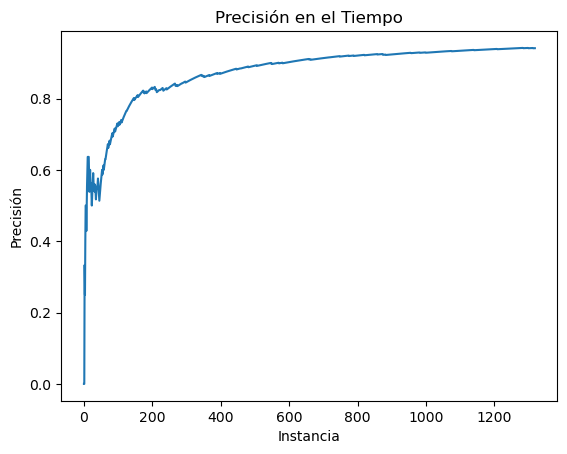

F1 Score: 0.00
MCC Score: 0.00


In [91]:
from river.drift import ADWIN

from river import forest
from river import tree
import pandas as pd
from river import anomaly
from river import metrics
import matplotlib.pyplot as plt
from river import stats

# Crear un ARF Classifier
arf = forest.ARFClassifier(grace_period= 60, lambda_value=6,leaf_prediction="mc",drift_detector=drift.binary.DDM(), warning_detector= drift.binary.DDM())


# Inicializar métricas
f1 = metrics.F1()
mcc = metrics.MCC()
accuracy = metrics.Accuracy()

# Detección de outliers con HalfSpaceTrees
#outlier_detector = anomaly.HalfSpaceTrees()
# Simular un flujo de datos
data = pd.read_csv("Heart Attack.csv")

accuracies = []

class IQR_Outlier_Detector:
    def __init__(self, factor=1.5):
        self.q1 = stats.Quantile(0.25)  # Primer cuartil
        self.q3 = stats.Quantile(0.75)  # Tercer cuartil
        self.factor = factor

    def update(self, value):
        self.q1.update(value)
        self.q3.update(value)

    def is_outlier(self, value):
        iqr = self.q3.get() - self.q1.get()
        lower_bound = self.q1.get() - self.factor * iqr
        upper_bound = self.q3.get() + self.factor * iqr

        return value < lower_bound or value > upper_bound

# Ejemplo de uso
detector = IQR_Outlier_Detector()

background_model = forest.ARFClassifier()



for i, row in data.iterrows():
    x = row.drop(['class'])
    y = row['class']
    detector.update(x[2])
    # Detección de outliers

    is_outlier = detector.is_outlier(x[2])

    if is_outlier == 0:
        # Entrenar el ARF solo si no es un outlier
        y_pred = arf.predict_one(x)
        arf.learn_one(x, y)
        
        # Actualizar las métricas
        f1.update(y, y_pred)
        mcc.update(y, y_pred)
        accuracy.update(y, y_pred)
        print(f"Accuracy at instance {i}: {accuracy.get():.2f}")
        arf.warning_detector.update(accuracy.get())
        arf.drift_detector.update(accuracy.get())
        #adwin_detector.update(accuracy.get())
        if arf.warning_detector.warning_detected:
            print(f"Warning detectedaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAA")
            background_model.learn_one(x, y)
        if arf.drift_detector.drift_detected:
        #if adwin_detector.drift_detected:
            print(f"*** Warning: Drift detected at instance {i}, reseteamos el modelo ***")
            #model = background_model
            model = background_model
        

        

    if is_outlier == 1:
        print(f"Outlier detected at instance {i}")
        print(f"valor de impulse: {x[2]} is an outlier!")

    # Calcular la precisión para un solo dato


    
    accuracies.append(accuracy.get())

# Crear un gráfico de precisión en el tiempo
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel("Instancia")
plt.ylabel("Precisión")
plt.title("Precisión en el Tiempo")
plt.show()

# Calcular métricas finales
print(f"F1 Score: {f1.get():.2f}")
print(f"MCC Score: {mcc.get():.2f}")